https://www.kaggle.com/PromptCloudHQ/jobs-on-naukricom/downloads/jobs-on-naukricom.zip/1

In [1]:
%cd ..

/home/elena/Documents/Project_jobs


In [2]:
import zipfile
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
zf = zipfile.ZipFile('data/jobs-on-naukricom.zip')
df = pd.read_csv(zf.open('naukri_com-job_sample.csv'))
print(df.shape)
df.head()

(22000, 14)


,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [4]:
df['postdate'] = pd.to_datetime(df['postdate'])
# print(df['postdate'].dtype)
# df['jobtitle'].isna().sum()
df.dropna(subset=['postdate'], inplace=True)
df['year'] = df['postdate'].dt.year.astype(int)
df['month'] = df['postdate'].dt.month.astype(int)
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,year,month
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00+00:00,NaN,ITES,43b19632647068535437c774b6ca6cf8,2016,5
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00+00:00,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,2016,5
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,2016,10
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,2016,10
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,2016,10


In [5]:
df.jobtitle.str.lower().value_counts().head(10)

business development manager      101
business development executive     96
software engineer                  88
android developer                  77
php developer                      72
project manager                    71
web designer                       69
content writer                     68
java developer                     61
sales executive                    60
Name: jobtitle, dtype: int64

In [6]:
def plot_vac(data, name):
#     fig = plt.figure(figsize=(30,7))
    ax = plt.subplot()
    
    import matplotlib.ticker as plticker
    loc = plticker.MultipleLocator(base=2.0)
    ax.xaxis.set_major_locator(loc)
    line = data.plot(ax=ax, color='green', marker='o')
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(name, fontsize=25)
    plt.ylabel('Number of vacancies', fontsize=20)
    plt.xlabel('Year, month', fontsize=20)
    plt.grid()
#     return plt.show()
    return (plt.savefig("results/" + name + ".png", bbox_inches='tight'), plt.show())

In [7]:
df_business_development = df[df.jobtitle.str.contains('business development', flags=re.IGNORECASE)]
df_business_development.shape
df_business_development_grouped = df_business_development.groupby(['year', 'month'])['jobtitle'].count()
df_business_development_grouped.head(10)

year  month
2015  11       106
      12        86
2016  1         53
      2         27
      3         77
      4         16
      5         69
      6          3
      8          6
      9          2
Name: jobtitle, dtype: int64

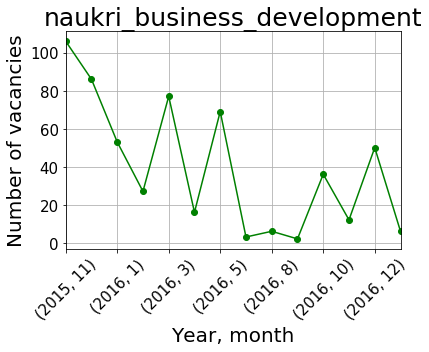

(None, None)

In [8]:
plot_vac(df_business_development_grouped, 'naukri_business_development')

In [9]:
df_software_engineer = df[df.jobtitle.str.contains('software engineer', flags=re.IGNORECASE)]
df_software_engineer.shape
df_software_engineer_grouped = df_software_engineer.groupby(['year', 'month'])['jobtitle'].count()
df_software_engineer_grouped

year  month
2015  11       88
      12       46
2016  1        99
      2        31
      3        70
      4        27
      5        26
      8        13
      10       62
      11       25
      12       42
2017  1         4
Name: jobtitle, dtype: int64

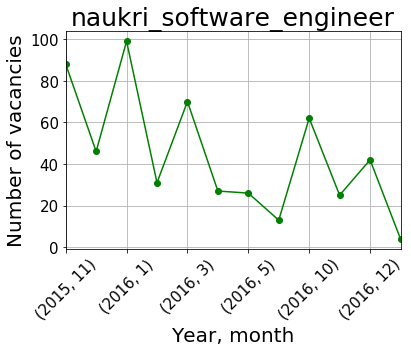

(None, None)

In [10]:
plot_vac(df_software_engineer_grouped, 'naukri_software_engineer')

In [11]:
df_data = df[df.jobtitle.str.contains('data', flags=re.IGNORECASE)]
df_data.shape
df_data_grouped = df_data.groupby(['year', 'month'])['jobtitle'].count()
df_data_grouped

year  month
2015  11        62
      12        28
2016  1         43
      2         22
      3        106
      4         36
      5         44
      6          1
      8         18
      9          4
      10        55
      11        29
      12        38
2017  1          2
Name: jobtitle, dtype: int64

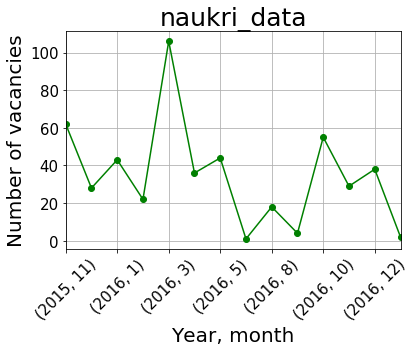

(None, None)

In [12]:
plot_vac(df_data_grouped, 'naukri_data')

In [13]:
df_blockchain = df[df.jobtitle.str.contains('blockchain', flags=re.IGNORECASE)]
df_blockchain.shape
df_blockchain_grouped = df_blockchain.groupby(['year', 'month'])['jobtitle'].count()
df_blockchain_grouped

year  month
2016  10       1
Name: jobtitle, dtype: int64

/home/elena/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


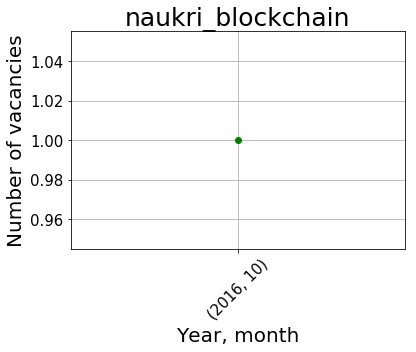

(None, None)

In [14]:
plot_vac(df_blockchain_grouped, 'naukri_blockchain')